In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv("../data/data_orders.csv")
offers = pd.read_csv("../data/data_offers.csv")

In [3]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [4]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


We have two data sets: data_orders and data_offers, both being stored in a CSV format. The data_orders data set contains the following columns:

order_datetime - time of the order  
origin_longitude - longitude of the order  
origin_latitude - latitude of the order  
m_order_eta - time before order arrival  
order_gk - order number  
order_status_key - status, an enumeration consisting of the following mapping:  
4 - cancelled by client,  
9 - cancelled by system, i.e., a reject  
is_driver_assigned_key - whether a driver has been assigned  
cancellation_time_in_seconds - how many seconds passed before cancellation  
The data_offers data set is a simple map with 2 columns:  

order_gk - order number, associated with the same column from the orders data set  
offer_id - ID of an offer

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [6]:
orders.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


# Part 1.
- Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?  

## Customer

In [7]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [8]:
orders.groupby(["order_status_key", "is_driver_assigned_key"], as_index=False).agg(
    total_cancelation=("order_gk", "count")
).assign(share_cancelation=lambda df: (df["total_cancelation"] / df["total_cancelation"].sum()) * 100)

,order_status_key,is_driver_assigned_key,total_cancelation,share_cancelation
0,4,0,4496,41.955954
1,4,1,2811,26.231803
2,9,0,3406,31.784248
3,9,1,3,0.027996


In [9]:
orders[orders["order_status_key"].eq(4)]

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [10]:
orders[orders.loc[:, "order_status_key"] == 4]

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [11]:
canceled_by_customer = orders.query("order_status_key == 4")

In [12]:
canceled_by_customer.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0


In [13]:
canceled_by_customer_driver_not_assigned = canceled_by_customer.query("is_driver_assigned_key == 0")

In [14]:
canceled_by_customer_driver_not_assigned

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0
10,15:40:15,-0.934670,51.447065,NaN,3000582991062,4,0,167.0
11,20:59:35,-0.972735,51.452489,NaN,3000583116472,4,0,45.0
12,06:25:31,-0.958791,51.459481,NaN,3000582765488,4,0,79.0
...,...,...,...,...,...,...,...,...
10709,12:44:11,-0.975372,51.457846,NaN,3000597886155,4,0,43.0
10710,12:42:52,-0.975372,51.457846,NaN,3000597886140,4,0,44.0
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0


(array([4.43e+03, 5.20e+01, 1.10e+01, 2.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([3.0000e+00, 4.1240e+02, 8.2180e+02, 1.2312e+03, 1.6406e+03,
        2.0500e+03, 2.4594e+03, 2.8688e+03, 3.2782e+03, 3.6876e+03,
        4.0970e+03]),
 <BarContainer object of 10 artists>)

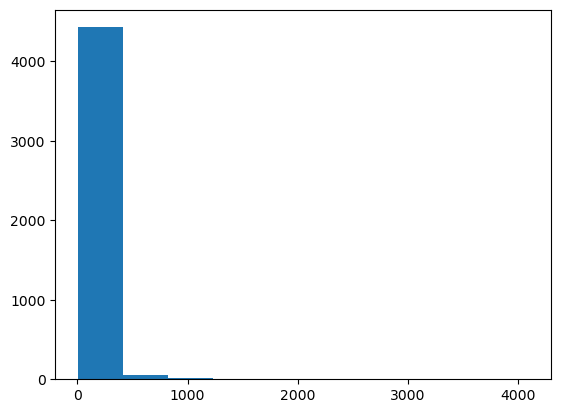

In [15]:
plt.hist(canceled_by_customer_driver_not_assigned["cancellations_time_in_seconds"])

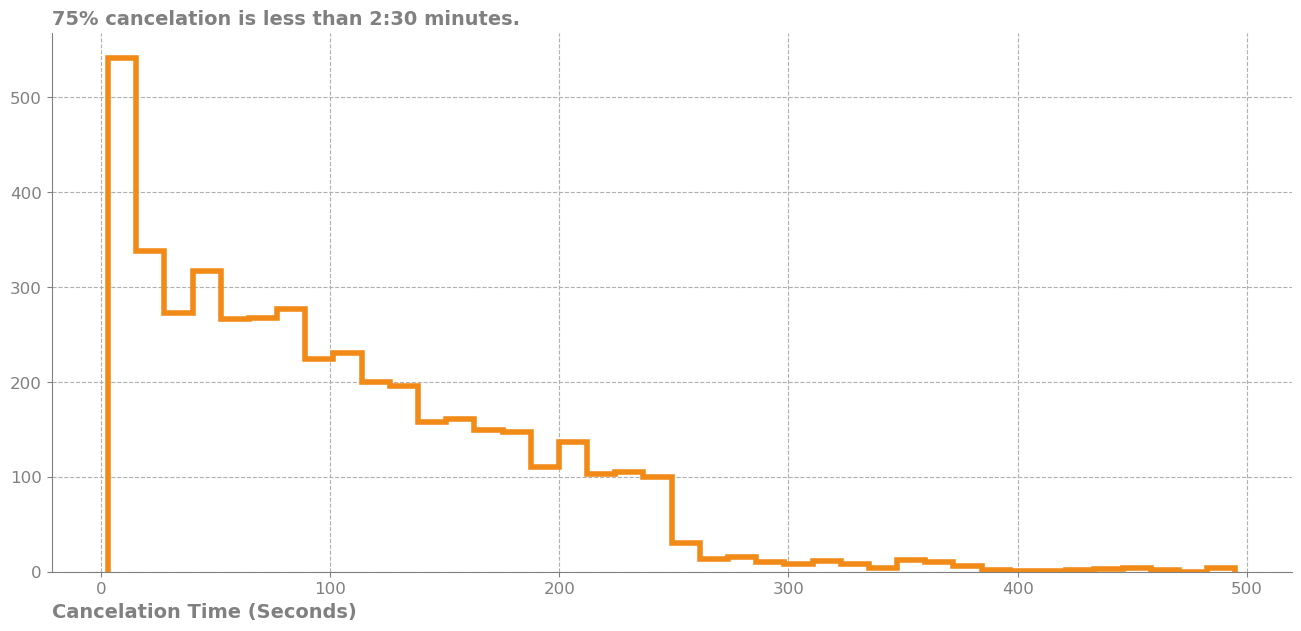

In [16]:
fig, ax = plt.subplots(figsize=(16, 7))
plt.hist(
    canceled_by_customer_driver_not_assigned.query(
        "cancellations_time_in_seconds < 500"
    )["cancellations_time_in_seconds"],
    bins=40,
    histtype="step",
    linewidth=4,
    color="#F28A17",
)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")

ax.grid(axis="x", linestyle="dashed")
ax.grid(axis="y", linestyle="dashed")

ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

ax.set_xlabel("Cancelation Time (Seconds)", loc="left", weight="bold", fontsize=14, color="gray")
ax.set_title("75% cancelation is less than 2:30 minutes. ", loc="left", weight="bold", fontsize=14, color="gray")

plt.show()

In [17]:
canceled_by_customer_driver_not_assigned["cancellations_time_in_seconds"].describe()

count    4496.000000
mean      110.371441
std       120.676021
min         3.000000
25%        38.000000
50%        88.000000
75%       157.000000
max      4097.000000
Name: cancellations_time_in_seconds, dtype: float64

In [18]:
canceled_by_customer_driver_delay = (canceled_by_customer.query("is_driver_assigned_key == 1")
                                                         .query("m_order_eta > cancellations_time_in_seconds"))

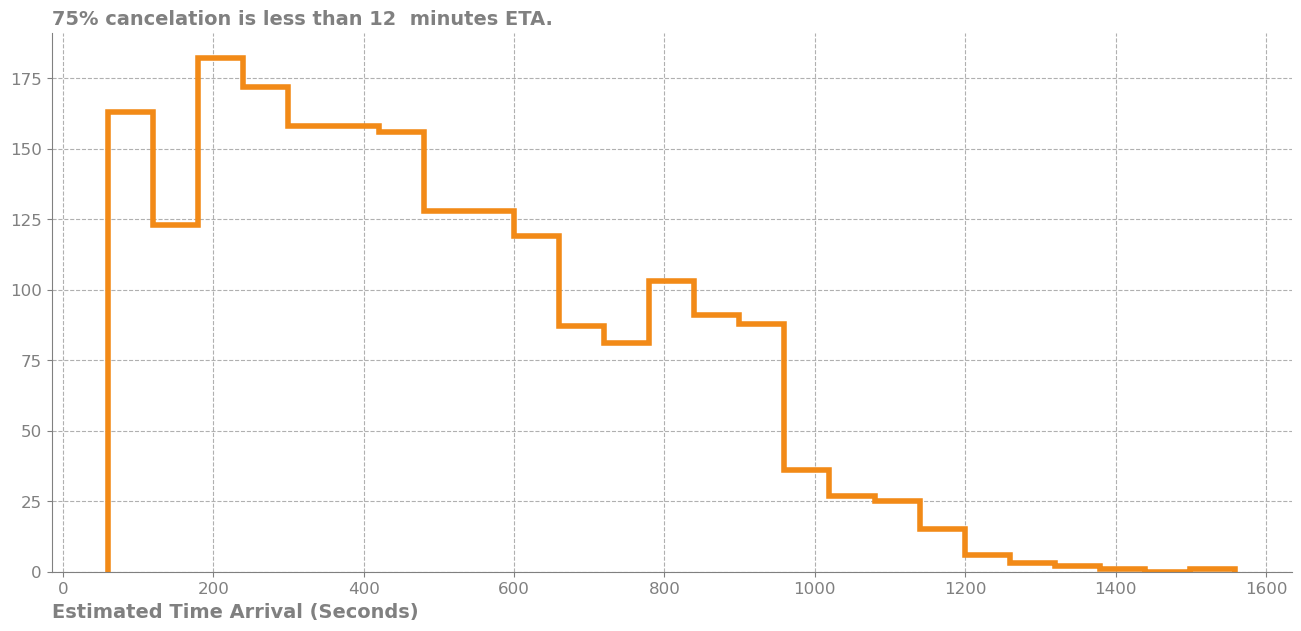

In [19]:
fig, ax = plt.subplots(figsize=(16, 7))
plt.hist(
    canceled_by_customer_driver_delay["m_order_eta"],
    bins=25,
    histtype="step",
    linewidth=4,
    color="#F28A17",
)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")

ax.grid(axis="x", linestyle="dashed")
ax.grid(axis="y", linestyle="dashed")

ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

ax.set_xlabel("Estimated Time Arrival (Seconds)", loc="left", weight="bold", fontsize=14, color="gray")
ax.set_title("75% cancelation is less than 12  minutes ETA. ", loc="left", weight="bold", fontsize=14, color="gray")

plt.show()

In [20]:
orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [21]:
canceled_by_customer_after_assignment = (canceled_by_customer.query("is_driver_assigned_key == 1 and cancellations_time_in_seconds > m_order_eta")
                                                            .assign(canceled_margin_time=lambda df: df["cancellations_time_in_seconds"] - df["m_order_eta"]))

In [22]:
canceled_by_customer_after_assignment

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,canceled_margin_time
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,138.0
14,00:59:26,-0.937006,51.448696,179.0,3000582566041,4,1,316.0,137.0
20,13:21:15,-0.978916,51.456173,60.0,3000582916858,4,1,475.0,415.0
28,22:41:17,-0.963063,51.449616,178.0,3000632496461,4,1,527.0,349.0
51,14:40:45,-0.982604,51.471714,237.0,3000632296105,4,1,418.0,181.0
...,...,...,...,...,...,...,...,...,...
10669,10:11:44,-0.989679,51.449001,60.0,3000554771801,4,1,153.0,93.0
10683,07:57:43,-0.977152,51.463967,60.0,3000554721424,4,1,481.0,421.0
10693,16:20:30,-0.971275,51.468651,298.0,3000554922773,4,1,501.0,203.0
10699,16:55:04,-0.971480,51.458364,113.0,3000629956882,4,1,244.0,131.0


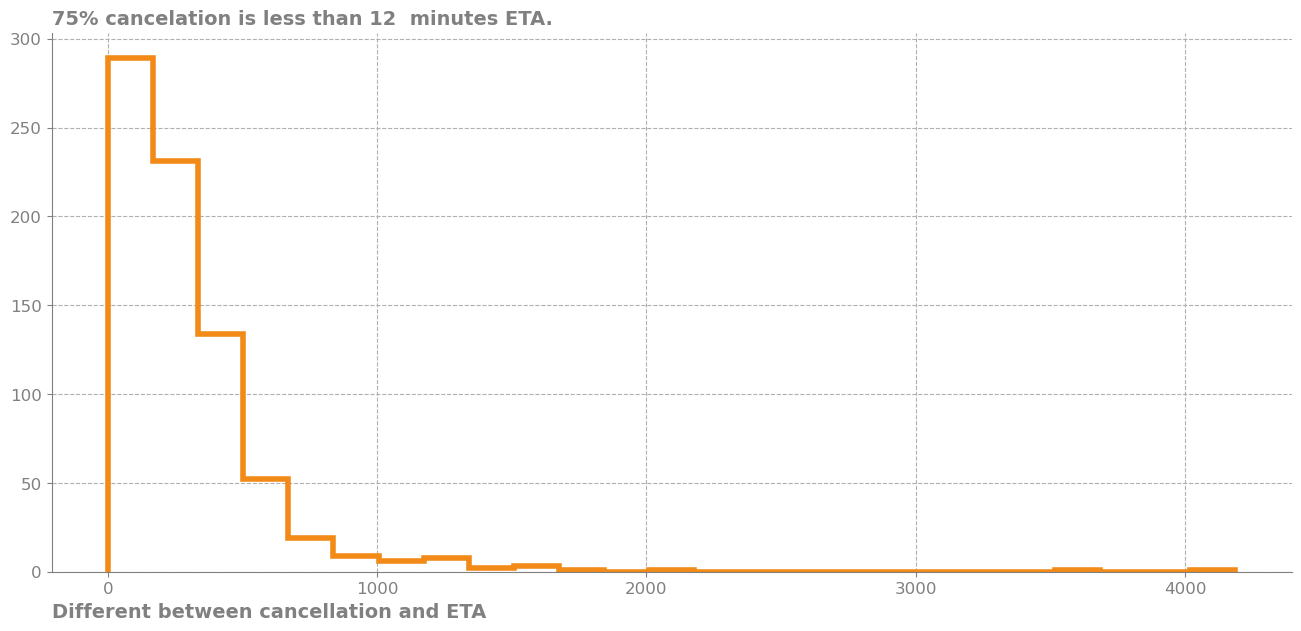

In [23]:
fig, ax = plt.subplots(figsize=(16, 7))
plt.hist(
    canceled_by_customer_after_assignment["canceled_margin_time"],
    bins=25,
    histtype="step",
    linewidth=4,
    color="#F28A17",
)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")

ax.grid(axis="x", linestyle="dashed")
ax.grid(axis="y", linestyle="dashed")

ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

ax.set_xlabel("Different between cancellation and ETA", loc="left", weight="bold", fontsize=14, color="gray")
ax.set_title("75% cancelation is less than 12  minutes ETA. ", loc="left", weight="bold", fontsize=14, color="gray")

plt.show()

## Canceled By System

In [24]:
canceled_by_system = orders.query("order_status_key == 9")

In [25]:
canceled_by_system

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
5,21:21:23,-0.947011,51.456380,NaN,3000583117054,9,0,NaN
6,07:58:15,-0.955637,51.470372,NaN,3000582791789,9,0,NaN
7,07:53:46,-0.978230,51.454575,NaN,3000582791562,9,0,NaN
8,08:53:01,-1.052298,51.454308,NaN,3000582817606,9,0,NaN
...,...,...,...,...,...,...,...,...
10673,14:55:53,-0.924138,51.436341,NaN,3000554896655,9,0,NaN
10682,08:04:58,-0.976793,51.462002,NaN,3000554721763,9,0,NaN
10684,08:08:36,-0.972801,51.478548,NaN,3000554721897,9,0,NaN
10685,23:33:46,-0.964696,51.445968,NaN,3000555121226,9,0,NaN


# Part 2.
- Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?  

In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [27]:
orders["order_datetime"].str.split(":").str.get(0)

0        18
1        20
2        12
3        13
4        21
         ..
10711    13
10712    13
10713    13
10714    13
10715    11
Name: order_datetime, Length: 10716, dtype: object

In [28]:
orders["order_datetime"].str.slice(0,2).astype("int")

0        18
1        20
2        12
3        13
4        21
         ..
10711    13
10712    13
10713    13
10714    13
10715    11
Name: order_datetime, Length: 10716, dtype: int32

In [29]:
orders = orders.assign(order_hour=lambda df: pd.to_datetime(df["order_datetime"], format="%H:%M:%S").dt.hour)

In [30]:
from scipy import stats
import numpy as np

In [33]:
hourly_canceled_orders = (orders.groupby("order_hour", as_index=False).agg(total_canceled_order=("order_gk", "count"))
                          .assign(total_canceled_order_zscore=lambda df: stats.zscore(df["total_canceled_order"]),
                                  hour_color=lambda df: np.where(df["total_canceled_order_zscore"].gt(1), "#F28A17", "gray"),
                                  hour_color_q3=lambda df: np.where(df["total_canceled_order"].gt(np.percentile(df["total_canceled_order"], 75)), "#F28A17", "gray")))

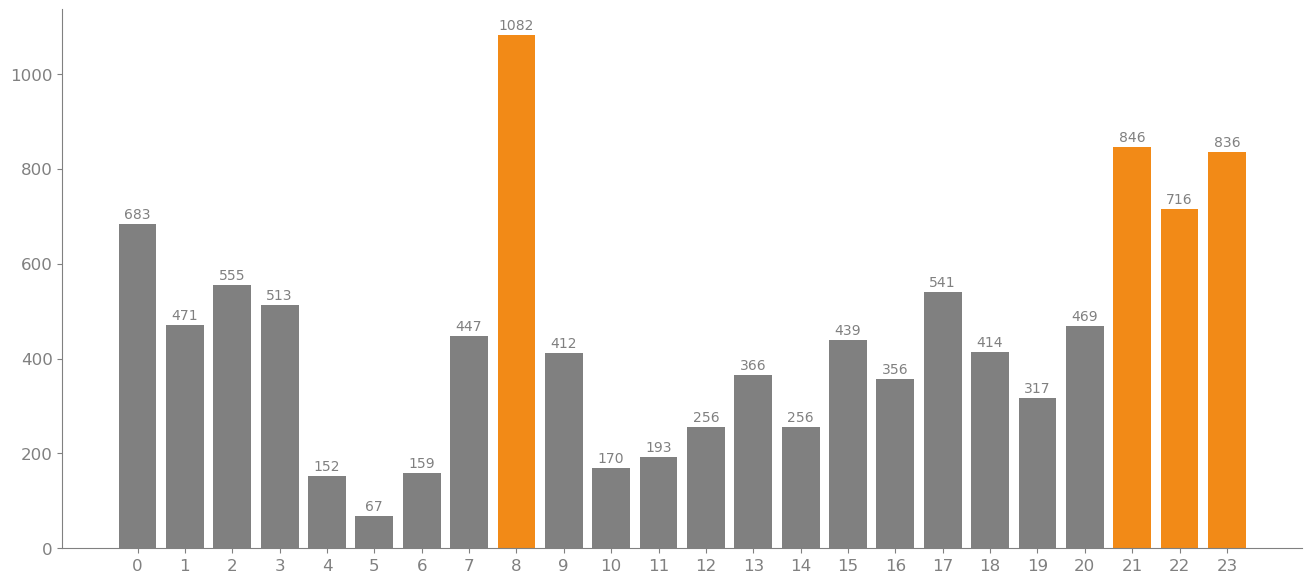

In [34]:
fig, ax = plt.subplots(figsize=(16, 7))
rect_hour = ax.bar(
    hourly_canceled_orders["order_hour"],
    hourly_canceled_orders["total_canceled_order"],
    color=hourly_canceled_orders["hour_color"])

ax.bar_label(rect_hour, label_type="edge", color="gray", padding=2)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")


ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

ax.set_xticks(range(0, 24))
# ax.set_xlabel("Different between cancellation and ETA", loc="left", weight="bold", fontsize=14, color="gray")
# ax.set_title("75% cancelation is less than 12  minutes ETA. ", loc="left", weight="bold", fontsize=14, color="gray")

plt.show()

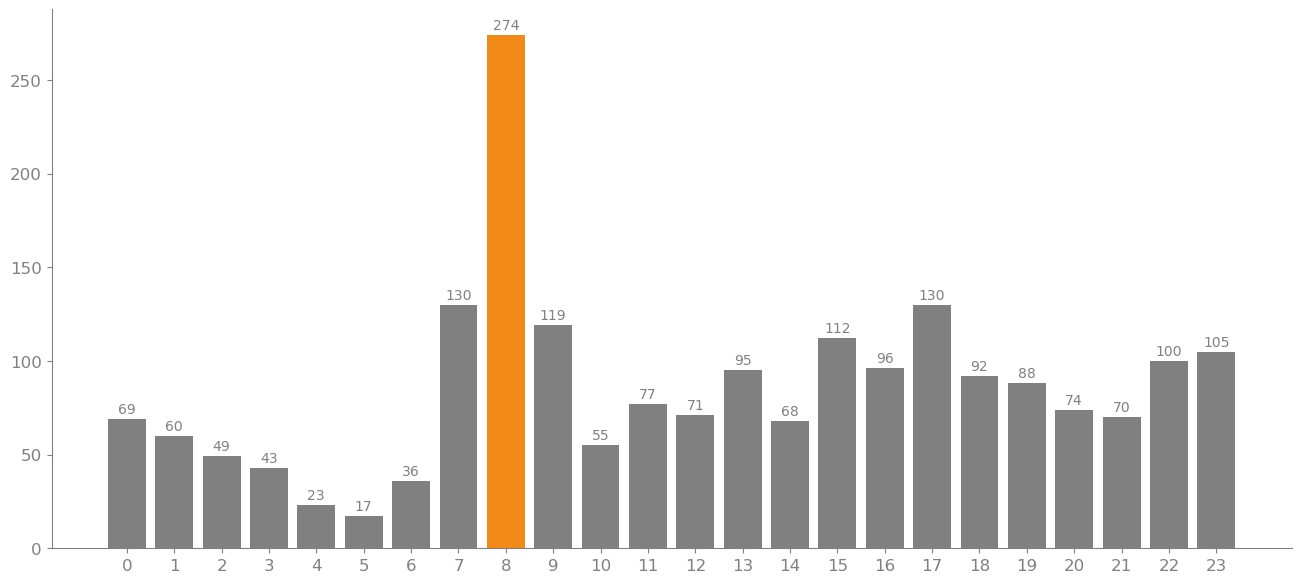

In [35]:
hourly_canceled_orders_by_customer_drive_delay = (orders.query("order_status_key == 4")
                                                .query("is_driver_assigned_key == 1")
                                                .query("m_order_eta > cancellations_time_in_seconds")
                                                .groupby("order_hour", as_index=False).agg(total_canceled_order=("order_gk", "count"))
                                        .assign(total_canceled_order_zscore=lambda df: stats.zscore(df["total_canceled_order"]),
                                                hour_color=lambda df: np.where(df["total_canceled_order_zscore"].gt(1), "#F28A17", "gray"),
                                                hour_color_q3=lambda df: np.where(df["total_canceled_order"].gt(np.percentile(hourly_canceled_orders["total_canceled_order"], 75)), "#F28A17", "gray")))

fig, ax = plt.subplots(figsize=(16, 7))
rect_hour = ax.bar(
    hourly_canceled_orders_by_customer_drive_delay["order_hour"],
    hourly_canceled_orders_by_customer_drive_delay["total_canceled_order"],
    color=hourly_canceled_orders_by_customer_drive_delay["hour_color"])

ax.bar_label(rect_hour, label_type="edge", color="gray", padding=2)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")


ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

ax.set_xticks(range(0, 24))
# ax.set_xlabel("Different between cancellation and ETA", loc="left", weight="bold", fontsize=14, color="gray")
# ax.set_title("75% cancelation is less than 12  minutes ETA. ", loc="left", weight="bold", fontsize=14, color="gray")

plt.show()

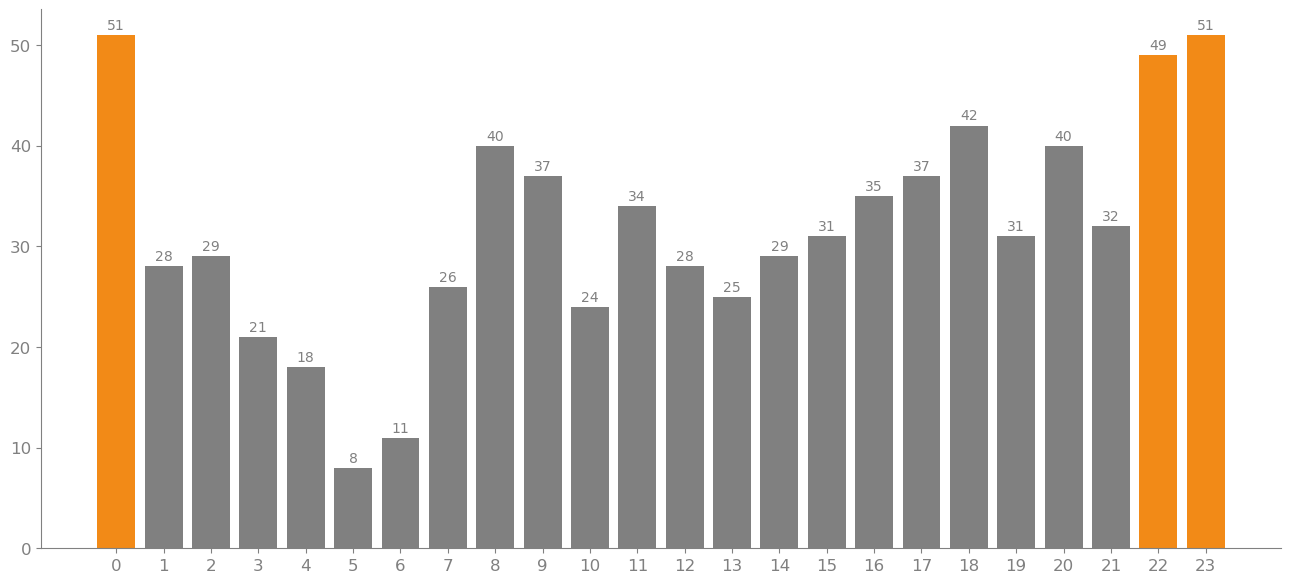

In [38]:
hourly_canceled_orders_by_customer_after_arrival = (orders.query("order_status_key == 4")
                                                .query("is_driver_assigned_key == 1")
                                                .query("cancellations_time_in_seconds > m_order_eta")
                                                .groupby("order_hour", as_index=False).agg(total_canceled_order=("order_gk", "count"))
                                        .assign(total_canceled_order_zscore=lambda df: stats.zscore(df["total_canceled_order"]),
                                                hour_color=lambda df: np.where(df["total_canceled_order_zscore"].gt(1), "#F28A17", "gray"),
                                                hour_color_q3=lambda df: np.where(df["total_canceled_order"].gt(np.percentile(hourly_canceled_orders["total_canceled_order"], 75)), "#F28A17", "gray")))

fig, ax = plt.subplots(figsize=(16, 7))
rect_hour = ax.bar(
    hourly_canceled_orders_by_customer_after_arrival["order_hour"],
    hourly_canceled_orders_by_customer_after_arrival["total_canceled_order"],
    color=hourly_canceled_orders_by_customer_after_arrival["hour_color"])

ax.bar_label(rect_hour, label_type="edge", color="gray", padding=2)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")


ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

ax.set_xticks(range(0, 24))
# ax.set_xlabel("Different between cancellation and ETA", loc="left", weight="bold", fontsize=14, color="gray")
# ax.set_title("75% cancelation is less than 12  minutes ETA. ", loc="left", weight="bold", fontsize=14, color="gray")

plt.show()

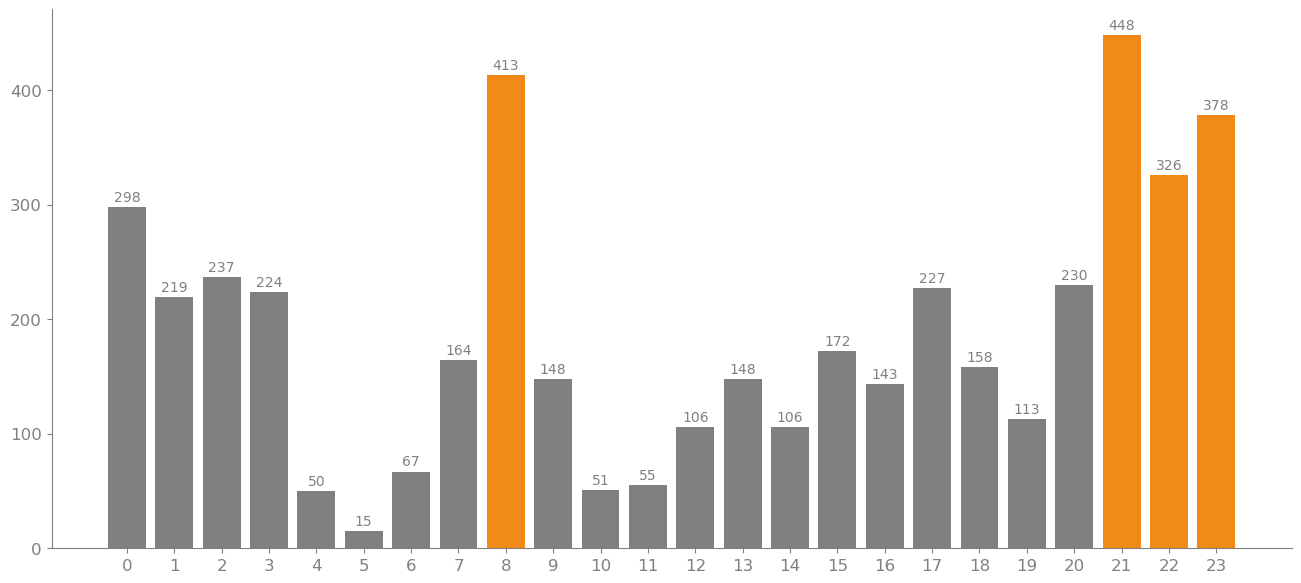

In [40]:
hourly_canceled_orders_by_customer_driver_not_assigned = (orders.query("order_status_key == 4")
                                                .query("is_driver_assigned_key == 0")
                                                .groupby("order_hour", as_index=False).agg(total_canceled_order=("order_gk", "count"))
                                        .assign(total_canceled_order_zscore=lambda df: stats.zscore(df["total_canceled_order"]),
                                                hour_color=lambda df: np.where(df["total_canceled_order_zscore"].gt(1), "#F28A17", "gray"),
                                                hour_color_q3=lambda df: np.where(df["total_canceled_order"].gt(np.percentile(hourly_canceled_orders["total_canceled_order"], 75)), "#F28A17", "gray")))

fig, ax = plt.subplots(figsize=(16, 7))
rect_hour = ax.bar(
    hourly_canceled_orders_by_customer_driver_not_assigned["order_hour"],
    hourly_canceled_orders_by_customer_driver_not_assigned["total_canceled_order"],
    color=hourly_canceled_orders_by_customer_driver_not_assigned["hour_color"])

ax.bar_label(rect_hour, label_type="edge", color="gray", padding=2)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")


ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

ax.set_xticks(range(0, 24))
# ax.set_xlabel("Different between cancellation and ETA", loc="left", weight="bold", fontsize=14, color="gray")
# ax.set_title("75% cancelation is less than 12  minutes ETA. ", loc="left", weight="bold", fontsize=14, color="gray")

plt.show()

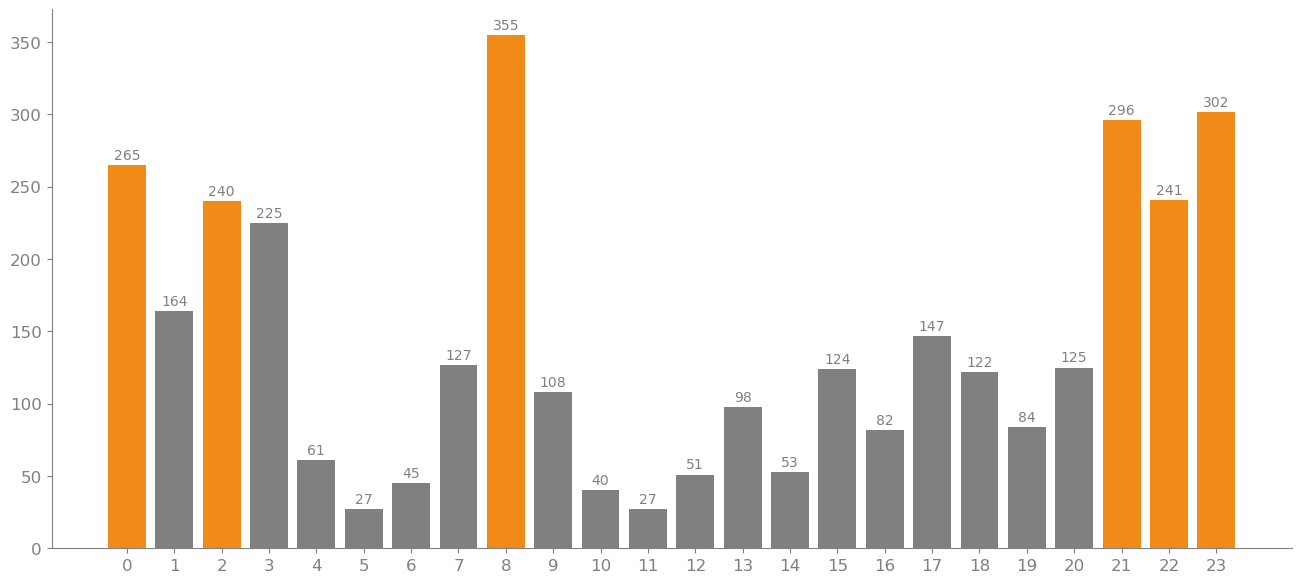

In [41]:
hourly_canceled_orders_by_system = (orders.query("order_status_key == 9")
                                                .groupby("order_hour", as_index=False).agg(total_canceled_order=("order_gk", "count"))
                                        .assign(total_canceled_order_zscore=lambda df: stats.zscore(df["total_canceled_order"]),
                                                hour_color=lambda df: np.where(df["total_canceled_order_zscore"].gt(1), "#F28A17", "gray"),
                                                hour_color_q3=lambda df: np.where(df["total_canceled_order"].gt(np.percentile(hourly_canceled_orders["total_canceled_order"], 75)), "#F28A17", "gray")))

fig, ax = plt.subplots(figsize=(16, 7))
rect_hour = ax.bar(
    hourly_canceled_orders_by_system["order_hour"],
    hourly_canceled_orders_by_system["total_canceled_order"],
    color=hourly_canceled_orders_by_system["hour_color"])

ax.bar_label(rect_hour, label_type="edge", color="gray", padding=2)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")


ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

ax.set_xticks(range(0, 24))
# ax.set_xlabel("Different between cancellation and ETA", loc="left", weight="bold", fontsize=14, color="gray")
# ax.set_title("75% cancelation is less than 12  minutes ETA. ", loc="left", weight="bold", fontsize=14, color="gray")

plt.show()

# Part 3.

Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

In [42]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21


In [69]:
orders.groupby(["is_driver_assigned_key", "order_hour"], as_index=False).agg(mean_cancellations_time_sec=("cancellations_time_in_seconds", "mean"))

,is_driver_assigned_key,order_hour,mean_cancellations_time_sec
0,0,0,111.557047
1,0,1,98.132420
2,0,2,106.438819
3,0,3,104.361607
4,0,4,90.000000
5,0,5,121.800000
6,0,6,124.955224
7,0,7,112.628049
8,0,8,120.702179
9,0,9,120.000000


<Axes: >

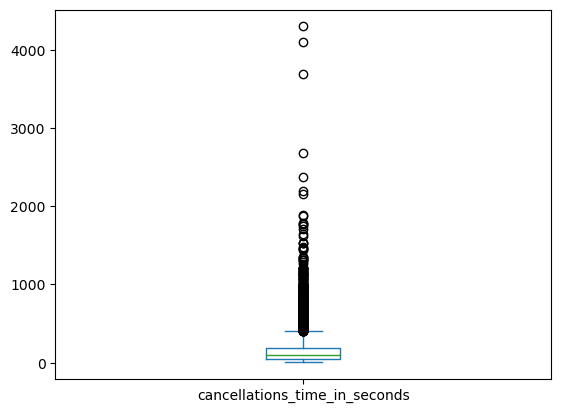

In [72]:
orders["cancellations_time_in_seconds"].plot(kind="box")

In [ ]:
# 1. Z-Score
# 2. Interquatile Range 

In [67]:
(pd.pivot_table(data=orders, 
               index="order_hour", 
               columns="is_driver_assigned_key", 
               values="cancellations_time_in_seconds", 
               aggfunc="mean")
    .reset_index()
    .rename(columns={"is_driver_assigned_key": "order_hour", 0: "driver_not_assigned", 1: "driver_assigned"})
    .assign(cancellations_time_changed=lambda df: (df["driver_assigned"] / df["driver_not_assigned"])))

is_driver_assigned_key,order_hour,driver_not_assigned,driver_assigned,cancellations_time_changed
0,0,111.557047,293.616667,2.631987
1,1,98.132420,247.715909,2.524302
2,2,106.438819,303.307692,2.849597
3,3,104.361607,292.640625,2.804102
4,4,90.000000,243.219512,2.702439
5,5,121.800000,314.400000,2.581281
6,6,124.955224,272.553191,2.181207
7,7,112.628049,188.891026,1.677122
8,8,120.702179,189.025478,1.566049
9,9,120.000000,216.493590,1.804113


# Z-score Outlier Detection.

In [78]:
normal_cancellation_orders = (orders.assign(cancellation_time_z_score=lambda df: stats.zscore(df["cancellations_time_in_seconds"], nan_policy="omit"))
 .query("cancellation_time_z_score > -2 or cancellation_time_z_score < 2"))

In [79]:
(pd.pivot_table(data=normal_cancellation_orders, 
               index="order_hour", 
               columns="is_driver_assigned_key", 
               values="cancellations_time_in_seconds", 
               aggfunc="mean")
    .reset_index()
    .rename(columns={"is_driver_assigned_key": "order_hour", 0: "driver_not_assigned", 1: "driver_assigned"})
    .assign(cancellations_time_changed=lambda df: (df["driver_assigned"] / df["driver_not_assigned"])))

is_driver_assigned_key,order_hour,driver_not_assigned,driver_assigned,cancellations_time_changed
0,0,111.557047,293.616667,2.631987
1,1,98.132420,247.715909,2.524302
2,2,106.438819,303.307692,2.849597
3,3,104.361607,292.640625,2.804102
4,4,90.000000,243.219512,2.702439
5,5,121.800000,314.400000,2.581281
6,6,124.955224,272.553191,2.181207
7,7,112.628049,188.891026,1.677122
8,8,120.702179,189.025478,1.566049
9,9,120.000000,216.493590,1.804113


# 2. Interquartile Outlier Detection

In [92]:
q1_cancellations_time = orders["cancellations_time_in_seconds"].quantile(.25)
q3_cancellations_time = orders["cancellations_time_in_seconds"].quantile(.75)

interquartile_cancellation_time = q3_cancellations_time - q1_cancellations_time

lower_bound_cancellation_time = q1_cancellations_time - 1.5 * interquartile_cancellation_time
upper_bound_cancellation_time = q3_cancellations_time + 1.5 * interquartile_cancellation_time

normal_cancellation_orders_iqr = (orders.assign(outlier_interquatile=lambda df: np.where(df["cancellations_time_in_seconds"].ge(upper_bound_cancellation_time) | df["cancellations_time_in_seconds"].le(lower_bound_cancellation_time), 
                                                        "outlier", 
                                                        "normal"))
                                        .query("outlier_interquatile == 'normal'"))

In [93]:
(pd.pivot_table(data=normal_cancellation_orders_iqr, 
               index="order_hour", 
               columns="is_driver_assigned_key", 
               values="cancellations_time_in_seconds", 
               aggfunc="mean")
    .reset_index()
    .rename(columns={"is_driver_assigned_key": "order_hour", 0: "driver_not_assigned", 1: "driver_assigned"})
    .assign(cancellations_time_changed=lambda df: (df["driver_assigned"] / df["driver_not_assigned"])))

is_driver_assigned_key,order_hour,driver_not_assigned,driver_assigned,cancellations_time_changed
0,0,103.453925,146.131868,1.412531
1,1,98.132420,132.985915,1.355168
2,2,101.205128,140.527273,1.388539
3,3,102.174888,115.326087,1.128713
4,4,90.000000,121.125000,1.345833
5,5,121.800000,100.368421,0.824043
6,6,101.384615,89.675676,0.884510
7,7,108.549383,122.962406,1.132778
8,8,110.412346,127.540925,1.155133
9,9,108.724138,127.781955,1.175286


# Part 4.
Plot the distribution of average ETA by hours. How can this plot be explained?

In [94]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21


In [102]:
hourly_mean_eta = (orders.groupby("order_hour", as_index=False).agg(mean_eta=("m_order_eta", "mean"))
                   .assign(mean_eta=lambda df: np.round(df["mean_eta"], 0),
                           mean_eta_zscore=lambda df: stats.zscore(df["mean_eta"]),
                           hour_color=lambda df: np.where(df["mean_eta_zscore"].gt(1), "#F28A17", "gray")))

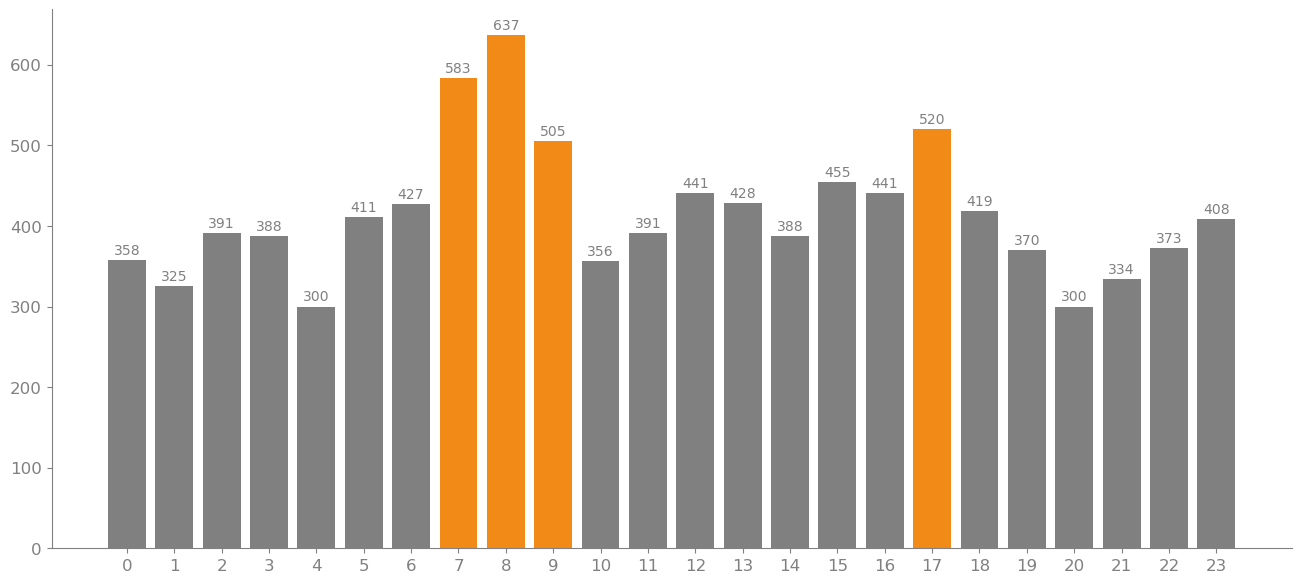

In [104]:
fig, ax = plt.subplots(figsize=(16, 7))
rect_hour = ax.bar(
    hourly_mean_eta["order_hour"],
    hourly_mean_eta["mean_eta"],
    color=hourly_mean_eta["hour_color"])

ax.bar_label(rect_hour, label_type="edge", color="gray", padding=2)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")


ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

ax.set_xticks(range(0, 24))
# ax.set_xlabel("Different between cancellation and ETA", loc="left", weight="bold", fontsize=14, color="gray")
# ax.set_title("75% cancelation is less than 12  minutes ETA. ", loc="left", weight="bold", fontsize=14, color="gray")

plt.show()

In [106]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21


# Bonus

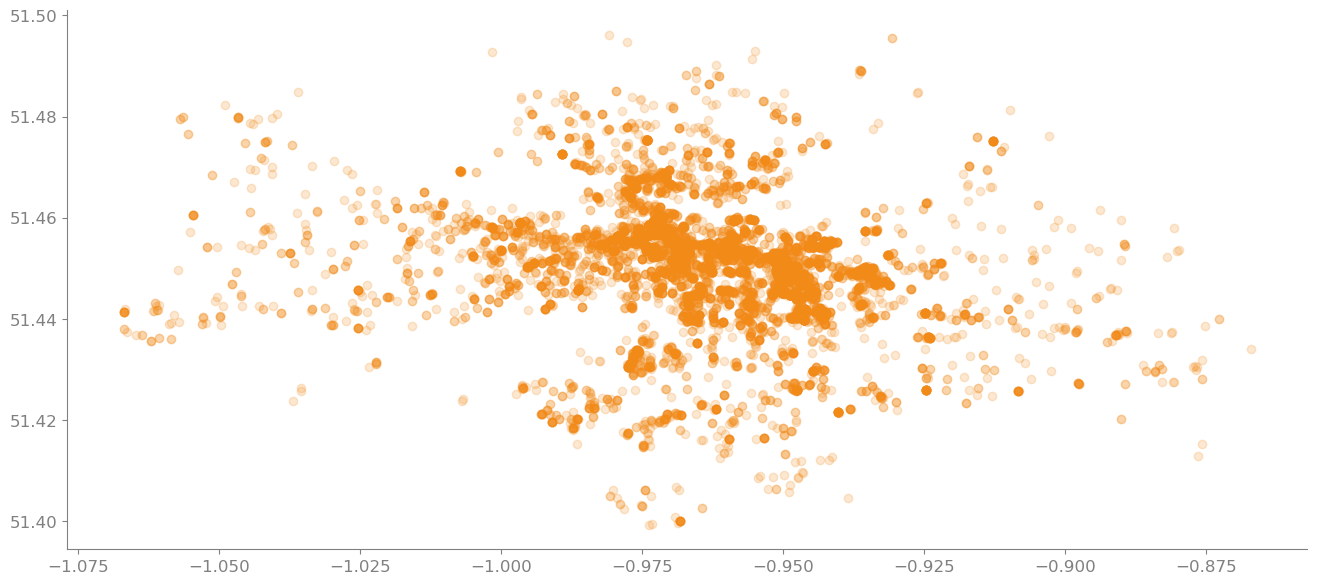

In [110]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.scatter(
    orders["origin_longitude"],
    orders["origin_latitude"],
    color="#F28A17",
    alpha=0.2)


ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")


ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

# ax.set_xlabel("Different between cancellation and ETA", loc="left", weight="bold", fontsize=14, color="gray")
# ax.set_title("75% cancelation is less than 12  minutes ETA. ", loc="left", weight="bold", fontsize=14, color="gray")

plt.show()

# 1. Parametric
 - H0: All order delivered under 50 min 
 - Ha: not H0
# 2. Non-Parametric

Scipy, Statsmodel

In [111]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [116]:
orders_with_eta = orders.dropna(subset="m_order_eta")

In [118]:
tukey_cancel = pairwise_tukeyhsd(endog=orders_with_eta["m_order_eta"],
                  groups=orders_with_eta["order_hour"],
                  alpha=0.05)

In [121]:
orders_with_eta.groupby("order_hour").agg(mean_eta=("m_order_eta", "mean"))

,mean_eta
order_hour,
0,357.959016
1,324.750000
2,391.012821
3,388.093750
4,299.658537
5,411.120000
6,427.148936
7,583.358974
8,636.910828


H0: Both Groups Have Same Mean.
Ha: Groups Not Have Same Mean

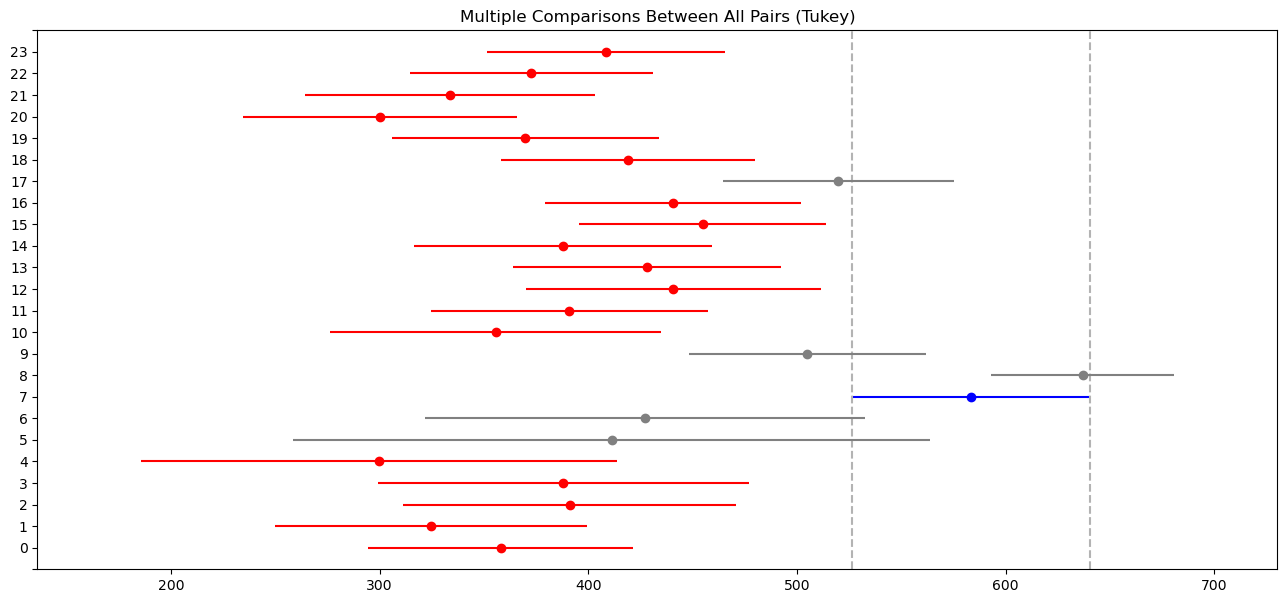

In [126]:
tukey_cancel.plot_simultaneous(figsize=( 16, 7), comparison_name=7)
plt.show()